**<h2>Importing Libraries**

In [101]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2 as cv
from scipy import ndimage
from skimage import io,color,measure

**<h2>Uploading the Image**

In [102]:

img=cv.imread('weld 23.png',0)
pixels_to_um=0.5

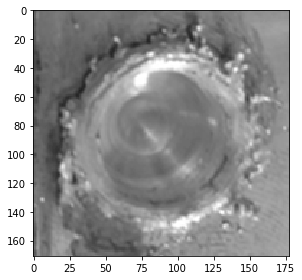

In [103]:
io.imshow(img)

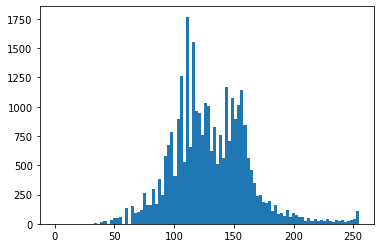

In [104]:
plt.hist(img.flat,bins=100,range=(0,255))
plt.show()

**<h2>Threshold Image**

In [105]:
ret,thresh=cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

In [106]:
ret

133.0

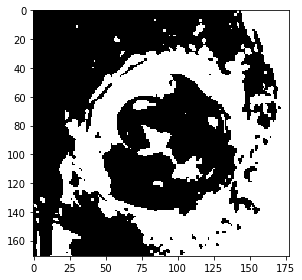

In [107]:
io.imshow(thresh)

**<h2>Creating an Eroded Image**

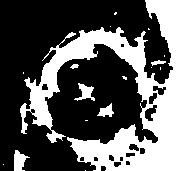

-1

In [108]:
from google.colab.patches import cv2_imshow
kernel=np.ones((3,3),np.uint8)
eroded=cv.erode(thresh,kernel,iterations=1)
cv2_imshow(eroded)
cv.waitKey(0)

**<h2> Dilating the Image**

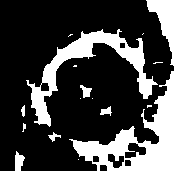

-1

In [109]:
dilated=cv.erode(eroded,kernel,iterations=1)
cv2_imshow(dilated)
cv.waitKey(0)

**<h2> Creating a Mask Image**

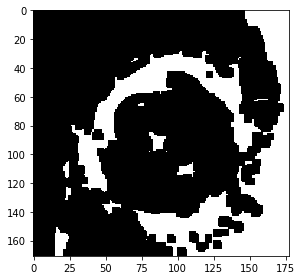

In [110]:
mask= dilated==255
io.imshow(mask)

**<h2> Labeling The Spot weld**

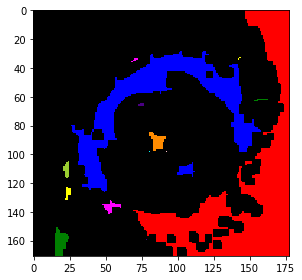

In [111]:
s=[[1,1,1],[1,1,1],[1,1,1]]
label_mask,num_labels=ndimage.label(mask,structure=s)
img2=color.label2rgb(label_mask,bg_label=0)
io.imshow(img2)


**<h2>Getting the properties and Storing them as a CSV file**

In [112]:
clusters=measure.regionprops(label_mask,img)

In [113]:
propList = ['Area',
            'equivalent_diameter', #Added... verify if it works
            'orientation', #Added, verify if it works. Angle btwn x-axis and major axis.
            'MajorAxisLength',
            'MinorAxisLength',
            'Perimeter',
            'MinIntensity',
            'MeanIntensity',
            'MaxIntensity']    

In [114]:
output_file = open('image1_measurements.csv', 'w')
output_file.write(',' + ",".join(propList) + '\n') #join strings in array by commas, leave first cell blank
#First cell blank to leave room for header (column names)

for cluster_props in clusters:
    #output cluster properties to the excel file
    output_file.write(str(cluster_props['Label']))
    for i,prop in enumerate(propList):
        if(prop == 'Area'): 
            to_print = cluster_props[prop]*pixels_to_um**2   #Convert pixel square to um square
        elif(prop == 'orientation'): 
            to_print = cluster_props[prop]*57.2958  #Convert to degrees from radians
        elif(prop.find('Intensity') < 0):          # Any prop without Intensity in its name
            to_print = cluster_props[prop]*pixels_to_um
        else: 
            to_print = cluster_props[prop]     #Reamining props, basically the ones with Intensity in its name
        output_file.write(',' + str(to_print))
    output_file.write('\n')
output_file.close()   